In [1]:
getwd()

[1] "C:/Users/vjsng/Data583/583project"

In [2]:
day = read.csv("Bike-Sharing-Dataset//day.csv", header = TRUE)
hour = read.csv("Bike-Sharing-Dataset//hour.csv", header = TRUE)

In [3]:
day$dteday = as.Date(day$dteday, format = "%Y-%m-%d") # converting 'dteday' column to date

In [4]:
head(day)
colSums(is.na(day))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


instant     dteday     season         yr       mnth    holiday    weekday 
         0          0          0          0          0          0          0 
workingday weathersit       temp      atemp        hum  windspeed     casual 
         0          0          0          0          0          0          0 
registered        cnt 
         0          0

# Data types

In [5]:
str(day)

'data.frame':	731 obs. of  16 variables:
 $ instant   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dteday    : Date, format: "2011-01-01" "2011-01-02" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ yr        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mnth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ weekday   : int  6 0 1 2 3 4 5 6 0 1 ...
 $ workingday: int  0 0 1 1 1 1 1 0 0 1 ...
 $ weathersit: int  2 2 1 1 1 1 2 2 1 1 ...
 $ temp      : num  0.344 0.363 0.196 0.2 0.227 ...
 $ atemp     : num  0.364 0.354 0.189 0.212 0.229 ...
 $ hum       : num  0.806 0.696 0.437 0.59 0.437 ...
 $ windspeed : num  0.16 0.249 0.248 0.16 0.187 ...
 $ casual    : int  331 131 120 108 82 88 148 68 54 41 ...
 $ registered: int  654 670 1229 1454 1518 1518 1362 891 768 1280 ...
 $ cnt       : int  985 801 1349 1562 1600 1606 1510 959 822 1321 ...


The dateday column has been explicitly converted to date format, it was 'char' by default.

In [6]:
dim(day)

[1] 731  16

In [7]:
day$rawtemp = day$temp * 41 # converting temp to raw form from normalized form
head(day)$rawtemp
day$rawatemp = day$atemp * 50 # converting atemp to raw form from normalized form
head(day)$rawatemp

[1] 14.110847 14.902598  8.050924  8.200000  9.305237  8.378268

[1] 18.18125 17.68695  9.47025 10.60610 11.46350 11.66045

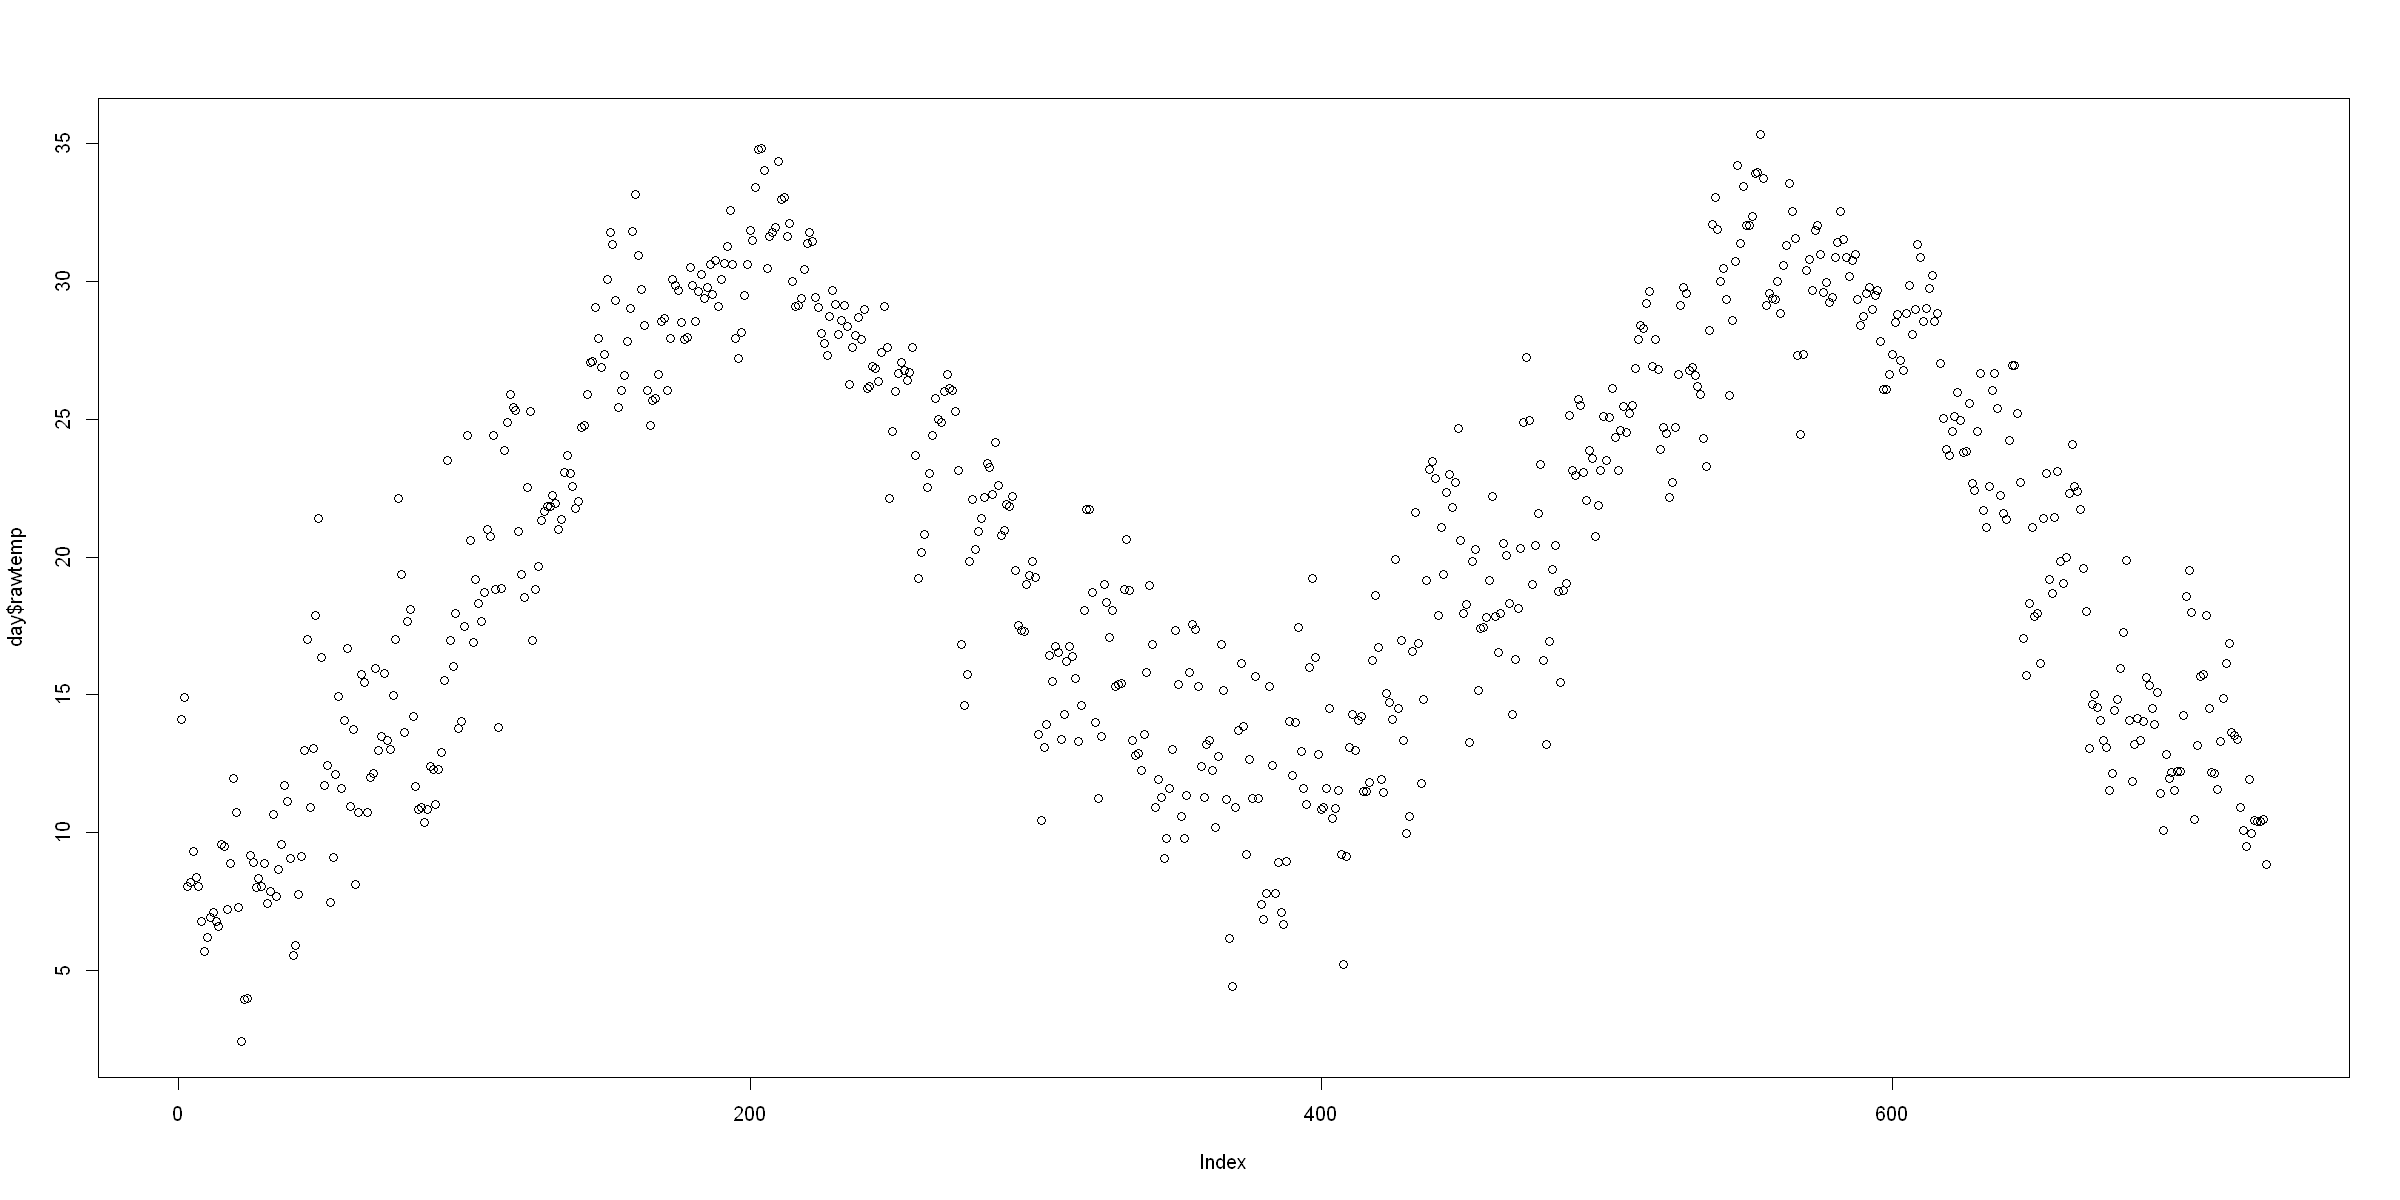

In [40]:
plot(day$rawtemp)
options(repr.plot.width = 20, repr.plot.height = 10)

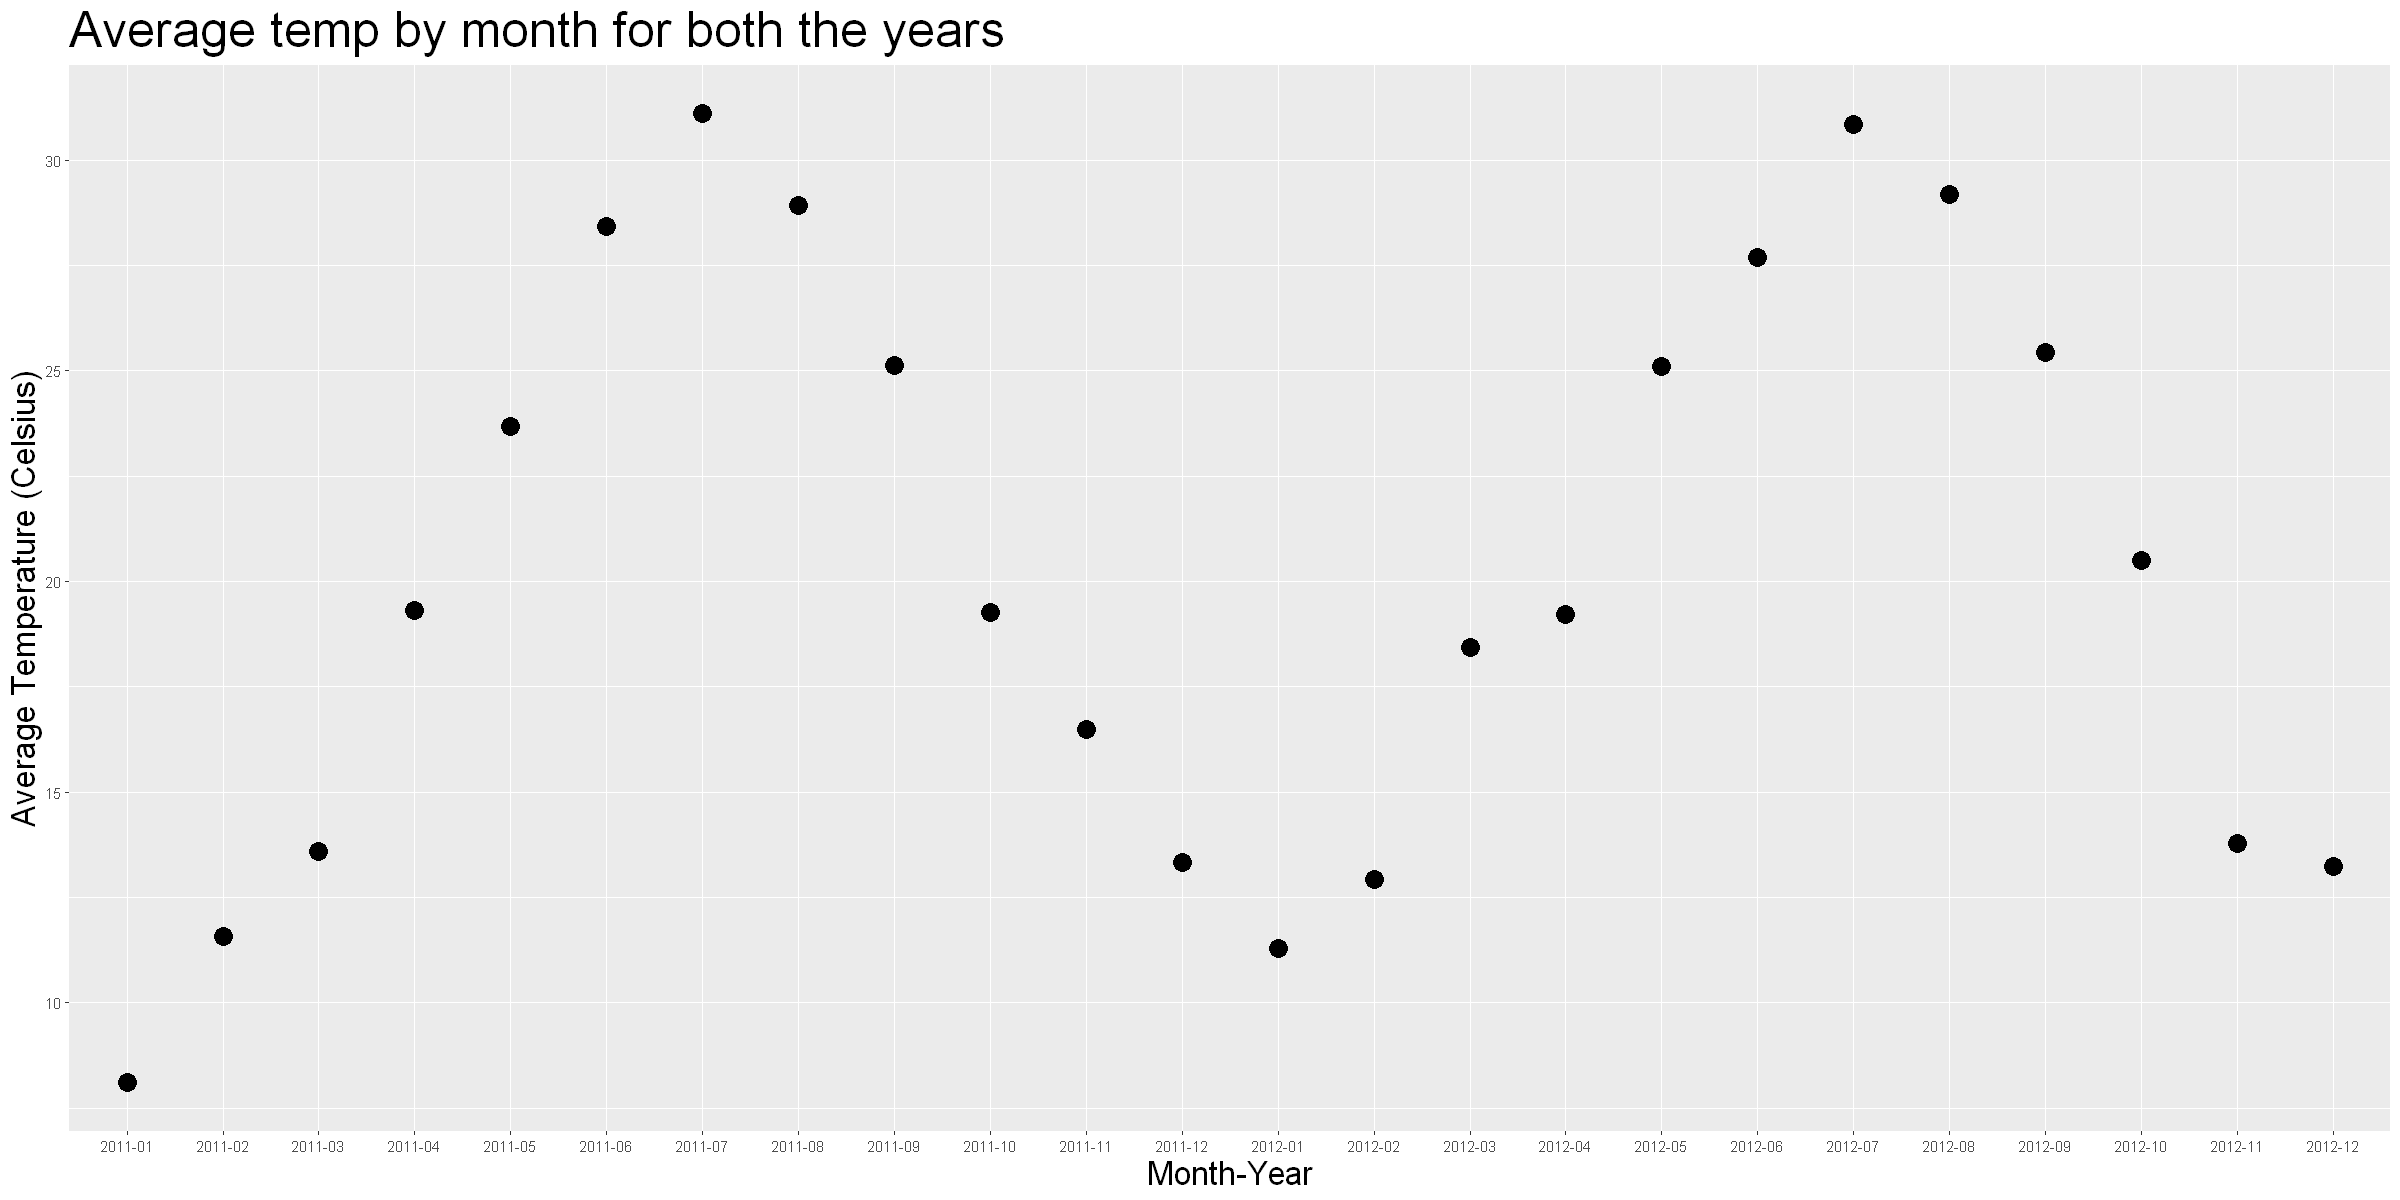

In [39]:
library(dplyr)
library(ggplot2)

df <- day %>% 
    mutate(month_year = format(dteday, "%Y-%m")) %>% 
    select(month_year, rawtemp)

# Calculate average temperature by month and year
df_avg <- df %>% 
  group_by(month_year) %>% 
  summarise(avg_rawtemp = mean(rawtemp))


# Plot the average temperature by month and year
ggplot(df_avg, aes(x = month_year, y = avg_rawtemp)) + 

geom_point(size = 5) +

labs(x = "Month-Year", y = "Average Temperature (Celsius)") +

ggtitle("Average temp by month for both the years") +

theme(axis.title.x = element_text(size = 20), 
      axis.title.y = element_text(size = 20), 
      plot.title = element_text(size = 30))

# options(repr.plot.width = 20, repr.plot.height = 10)